In [6]:
import numpy as np
from scipy.stats import uniform, norm, poisson
from collections import Counter
import json, os, shutil

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
sns.set(font='Avenir', style='white')

In [8]:
size = int(1e5)
dists = {'uniform': uniform(loc=50, scale=20), 
         'normal': norm(loc=50, scale=3), 
         'poisson': poisson(mu=50, loc=0)}

In [9]:
dir = './simulate_' + str(size) + '/'
if os.path.exists(dir):
    shutil.rmtree(dir)

os.makedirs(dir)

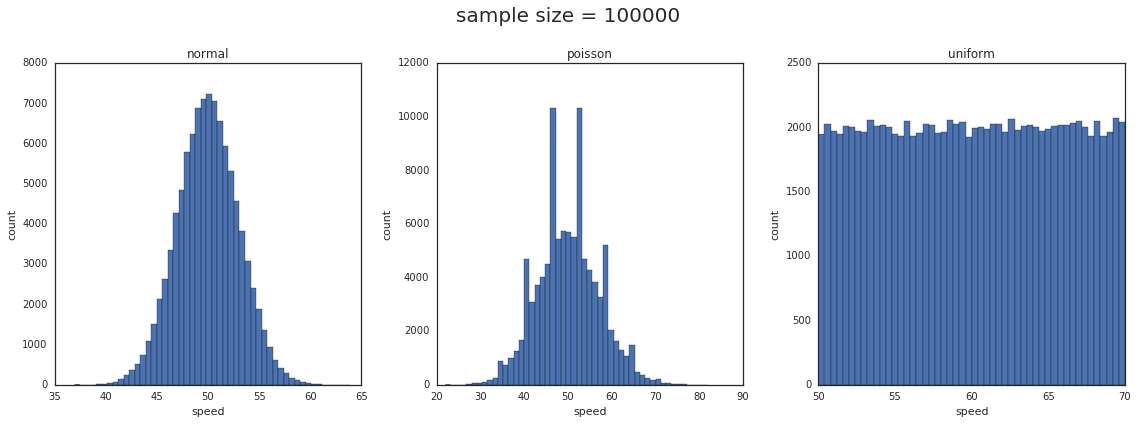

In [10]:
fig = plt.figure(figsize=(16,6))

i = 0
for name,dist in dists.iteritems():
    i += 1
    
    # simulate observed speeds
    rnd = dist.rvs(size)
    ax = fig.add_subplot(1,3,i)
    ax.hist(rnd, bins=50)
    ax.set_title(name)
    ax.set_xlabel('speed')
    ax.set_ylabel('count')
    
    # create daily increment histogram
    rnd = np.round(rnd).astype(int)
    ctr = Counter(rnd)
    with open(dir + name, 'w') as outfile:
        json.dump(ctr, outfile)

plt.suptitle('sample size = ' + str(size), size=20)
plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.savefig(dir + 'histograms.png', dpi=300)